---
 reading in file /home/sirfuser/data/m3d.h5...
---
 pre-processing acquisition data...
---
 reconstructing...
Close Figure 1 window to continue...


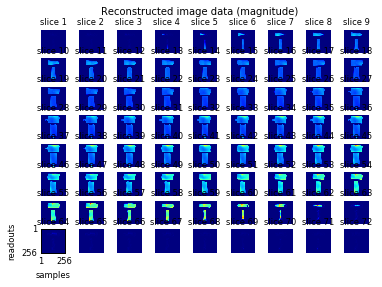

Close Figure 1 window to continue...


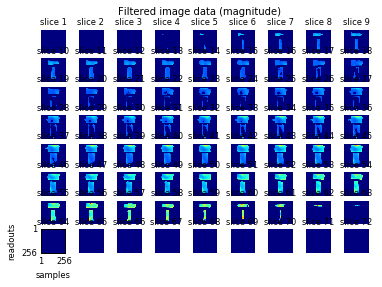

0

In [5]:
#'''
#Low-level interface demo that illustrates pre-processing of MR raw (k-
#space) data, 2D image reconstruction using FFT and image display.
#
#Usage:
#  fully_sampled_recon.py [--help | options]
#
#Options:
#  -f <file>, --file=<file>    raw data file
#                              [default: simulated_MR_2D_cartesian.h5]
#  -p <path>, --path=<path>    path to data files, defaults to data/examples/MR
#                              subfolder of SIRF root folder
#  -e <engn>, --engine=<engn>  reconstruction engine [default: Gadgetron]
#'''
#
## CCP PETMR Synergistic Image Reconstruction Framework (SIRF).
## Copyright 2015 - 2017 Rutherford Appleton Laboratory STFC.
## Copyright 2015 - 2017 University College London.
## Copyright 2015 - 2017 Physikalisch-Technische Bundesanstalt.
##
## This is software developed for the Collaborative Computational
## Project in Positron Emission Tomography and Magnetic Resonance imaging
## (http://www.ccppetmr.ac.uk/).
##
## Licensed under the Apache License, Version 2.0 (the "License");
##   you may not use this file except in compliance with the License.
##   You may obtain a copy of the License at
##       http://www.apache.org/licenses/LICENSE-2.0
##   Unless required by applicable law or agreed to in writing, software
##   distributed under the License is distributed on an "AS IS" BASIS,
##   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
##   See the License for the specific language governing permissions and
##   limitations under the License.

__version__ = '0.1.0'
from docopt import docopt
#args = docopt(__doc__, version=__version__)

# import engine module
#exec('from p' + args['--engine'] + ' import *')

from pGadgetron import *

# Simulated Data
data_file = 'simulated_MR_2D_cartesian.h5'
data_path = petmr_data_path('mr')

# Siemens data
data_file = 'm3d.h5'
data_path = '/home/sirfuser/data'

# locate the input data file
input_file = existing_filepath(data_path, data_file)

# all acquisition data generated by this script will be stored in memory
# (the input data will remain in the input file)
AcquisitionData.set_storage_scheme('memory')

# MR raw data formats from different vendors can be transformed to 
# HDF file format using siemens_to_ismrmrd, philips_to_ismrmrd or
# bruker_to_ismrmrd on https://github.com/ismrmrd/.
# Acquisition data will be read from an HDF file input_file
print('---\n reading in file %s...' % input_file)
acq_data = AcquisitionData(input_file)

# pre-process acquired k-space data:
# prior to image reconstruction several pre-processing steps such as 
# asymmetric echo compensation, noise decorelation for multi-coil data or 
# removal of oversampling along frequency encoding (i.e. readout or kx)
# direction. So far only the removal of readout oversampling and noise and
# asymmetric echo adjusting is implemented
print('---\n pre-processing acquisition data...')
processed_data = preprocess_acquisition_data(acq_data)

# setup reconstruction:
# create a reconstruction object using 2D inverse Fourier transform and
# provide pre-processed k-space data as input
recon = FullySampledReconstructor()
recon.set_input(processed_data)
    
# perform reconstruction
print('---\n reconstructing...')
recon.process()
    
# retrieve reconstruced image data
image_data = recon.get_output()

# show reconstructed image data
image_array = image_data.as_array()
title = 'Reconstructed image data (magnitude)'
show_3D_array(abs(image_array), suptitle = title, label = 'slice', \
             xlabel = 'samples', ylabel = 'readouts')

# filter the image
select = image_array.real < 0.2*numpy.amax(image_array.real)
image_array[select] = 0
image_data.fill(image_array)
image_array = image_data.as_array()
title = 'Filtered image data (magnitude)'
show_3D_array(abs(image_array), suptitle = title, label = 'slice', \
                  xlabel = 'samples', ylabel = 'readouts')


